In [1]:
#FINANCE HOMEWORK 1
#DANDI CHEN, PUJA SUBRAMANIAM, DERRICK HUNG

from pandas import Series, DataFrame
import pandas as pd
import re
from datetime import datetime
import copy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Derrick\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#read the stock data from the file

df = pd.read_csv('StockData.csv') 

#change date format to date
df['date'] = pd.to_datetime(df['date'],format='%Y%m%d')

df[:5]
#calculate Market Cap base on share outstanding and price 
df['MarketCap'] = df['Price'] * df['Share Outstanding']
df[:5]


PERMNO       date TICKER Security Status    Bid     Ask  Price  Volume  \
0   10001 2008-12-31   EWST               R  6.795  8.2600  8.260  1292.0   
1   10001 2009-01-30   EWST               R  8.270  8.9899  8.502   695.0   
2   10001 2009-02-27   EWST               R  8.150  8.9400  8.940   412.0   
3   10001 2009-03-31   EWST               R  7.020  8.2000  8.180   979.0   
4   10001 2009-04-30   EWST               R  7.680  8.8500  8.500   828.0   

   Share Outstanding  Spread  Value Weighted Return (w dist)  \
0             4297.0     NaN                        0.022154   
1             4297.0     NaN                       -0.077315   
2             4297.0     NaN                       -0.100271   
3             4300.0     NaN                        0.086748   
4             4300.0     NaN                        0.109352   

   Value Weighted Return (exc dividends)  MarketCap  
0                               0.019087  35493.220  
1                              -0.078709  36533.094  
2                              -0.103457  38415.180  
3                               0.083489  35174.000  
4                               0.107516  36550.000

In [3]:
#shrunk df to include the necessary stuff
df = df[['date', 'TICKER', 'Bid', 'Ask','Price','Volume','Share Outstanding', 'MarketCap']]

In [4]:
# create column for the quarter and month that the data is in 
df['quarter'] = df['date'].dt.to_period("Q")
df['Month'] = df['date'].dt.to_period("M").astype(str).str[5:]

In [5]:
df

date TICKER        Bid        Ask      Price     Volume  \
0      2008-12-31   EWST    6.79500    8.26000    8.26000     1292.0   
1      2009-01-30   EWST    8.27000    8.98990    8.50200      695.0   
2      2009-02-27   EWST    8.15000    8.94000    8.94000      412.0   
3      2009-03-31   EWST    7.02000    8.20000    8.18000      979.0   
4      2009-04-30   EWST    7.68000    8.85000    8.50000      828.0   
5      2009-05-29   EWST    8.40000    9.08900    8.48000      825.0   
6      2009-06-30   EWST    8.16000    9.02500    8.59990     1122.0   
7      2009-07-31   EWST    8.10750    8.94220    8.15000     1441.0   
8      2009-08-31   EGAS    8.05000    8.75000    8.54000     1474.0   
9      2009-09-30   EGAS    8.17000    8.63000    8.59990     1960.0   
10     2009-10-30   EGAS    8.35000    9.20010    8.88000     3329.0   
11     2009-11-30   EGAS    8.68000    9.15000    8.89800     1149.0   
12     2009-12-31   EGAS    8.38000   10.75120   10.30000     7231.0   
13     2010-01-29   EGAS    9.86000   10.50000   10.06000     3104.0   
14     2010-02-26   EGAS    9.92000   10.22010   10.00840     1510.0   
15     2010-03-31   EGAS    9.91000   10.18000   10.17000     2283.0   
16     2010-04-30   EGAS   10.25000   11.61000   11.39000     3350.0   
17     2010-05-28   EGAS   10.39000   11.80000   11.40000     3451.0   
18     2010-06-30   EGAS   10.86000   12.30000   10.86000     3537.0   
19     2010-07-30   EGAS   10.85000   11.81000   11.72000     2858.0   
20     2010-08-31   EGAS   10.15000   12.35000   10.37100     2595.0   
21     2010-09-30   EGAS   10.43500   11.24000   11.12000     1591.0   
22     2010-10-29   EGAS   11.00000   11.45000   11.43990     1803.0   
23     2010-11-30   EGAS    9.79000   11.35000   10.04000    12695.0   
24     2010-12-31   EGAS   10.08000   10.53000   10.52000     5200.0   
25     2011-01-31   EGAS   10.40000   10.92000   10.78000     4648.0   
26     2011-02-28   EGAS   10.76000   10.99000   10.98000     4586.0   
27     2011-03-31   EGAS   10.82500   11.73000   11.73000     4137.0   
28     2011-04-29   EGAS   11.23000   11.83000   11.23000     4109.0   
29     2011-05-31   EGAS   11.09000   11.50000   11.50000     4979.0   
...           ...    ...        ...        ...        ...        ...   
853700 2016-07-29   TSLA  213.98000  234.78999  234.78999   742092.0   
853701 2016-08-31   TSLA  211.34000  230.61000  212.00999   622504.0   
853702 2016-09-30   TSLA  194.47000  208.99001  204.03000   707217.0   
853703 2016-10-31   TSLA  193.96001  213.70000  197.73000   922365.0   
853704 2016-11-30   TSLA  181.45000  196.64999  189.39999   988496.0   
853705 2016-12-30   TSLA  181.47000  219.74001  213.69000   879924.0   
853706 2017-01-31   TSLA  216.99001  254.61000  251.92999  1008133.0   
853707 2017-02-28   TSLA  246.23000  280.98001  249.99001  1195495.0   
853708 2017-03-31   TSLA  243.69000  278.29999  278.29999  1070387.0   
853709 2017-04-28   TSLA  295.00000  314.07001  314.07001  1170001.0   
853710 2017-05-31   TSLA  295.45999  341.01001  341.01001  1481990.0   
853711 2017-06-30   TSLA  339.85001  383.45001  361.60999  1859796.0   
853712 2017-07-31   TSLA  308.82999  352.62000  323.47000  1816705.0   
853713 2017-08-31   TSLA  319.57001  365.22000  355.89999  1369905.0   
853714 2017-09-29   TSLA  339.60001  385.00000  341.10001  1115125.0   
853715 2017-10-31   TSLA  320.07999  359.64999  331.53000  1230312.0   
853716 2017-11-30   TSLA  299.26001  321.07999  308.85001  1488451.0   
853717 2017-12-29   TSLA  303.70001  343.45001  311.35001  1099476.0   
853718 2018-01-31   TSLA  314.62000  354.31000  354.31000  1243079.0   
853719 2018-02-28   TSLA  310.42001  357.42001  343.06000  1091960.0   
853720 2018-03-29   TSLA  257.78000  345.51001  266.13000  1572578.0   
853721 2018-04-30   TSLA  252.48000  305.72000  293.89999  1906004.0   
853722 2018-05-31   TSLA  275.01001  306.85001  284.73001  1555774.0   
853723 2018-06-29   TSLA  291.13000  370.82999  342.9

In [6]:
#create column for quarter and year 
df['part']= df['quarter'].astype(str).str[4:]
df['Year']= df['quarter'].astype(str).str[:4]

In [7]:
df

date TICKER        Bid        Ask      Price     Volume  \
0      2008-12-31   EWST    6.79500    8.26000    8.26000     1292.0   
1      2009-01-30   EWST    8.27000    8.98990    8.50200      695.0   
2      2009-02-27   EWST    8.15000    8.94000    8.94000      412.0   
3      2009-03-31   EWST    7.02000    8.20000    8.18000      979.0   
4      2009-04-30   EWST    7.68000    8.85000    8.50000      828.0   
5      2009-05-29   EWST    8.40000    9.08900    8.48000      825.0   
6      2009-06-30   EWST    8.16000    9.02500    8.59990     1122.0   
7      2009-07-31   EWST    8.10750    8.94220    8.15000     1441.0   
8      2009-08-31   EGAS    8.05000    8.75000    8.54000     1474.0   
9      2009-09-30   EGAS    8.17000    8.63000    8.59990     1960.0   
10     2009-10-30   EGAS    8.35000    9.20010    8.88000     3329.0   
11     2009-11-30   EGAS    8.68000    9.15000    8.89800     1149.0   
12     2009-12-31   EGAS    8.38000   10.75120   10.30000     7231.0   
13     2010-01-29   EGAS    9.86000   10.50000   10.06000     3104.0   
14     2010-02-26   EGAS    9.92000   10.22010   10.00840     1510.0   
15     2010-03-31   EGAS    9.91000   10.18000   10.17000     2283.0   
16     2010-04-30   EGAS   10.25000   11.61000   11.39000     3350.0   
17     2010-05-28   EGAS   10.39000   11.80000   11.40000     3451.0   
18     2010-06-30   EGAS   10.86000   12.30000   10.86000     3537.0   
19     2010-07-30   EGAS   10.85000   11.81000   11.72000     2858.0   
20     2010-08-31   EGAS   10.15000   12.35000   10.37100     2595.0   
21     2010-09-30   EGAS   10.43500   11.24000   11.12000     1591.0   
22     2010-10-29   EGAS   11.00000   11.45000   11.43990     1803.0   
23     2010-11-30   EGAS    9.79000   11.35000   10.04000    12695.0   
24     2010-12-31   EGAS   10.08000   10.53000   10.52000     5200.0   
25     2011-01-31   EGAS   10.40000   10.92000   10.78000     4648.0   
26     2011-02-28   EGAS   10.76000   10.99000   10.98000     4586.0   
27     2011-03-31   EGAS   10.82500   11.73000   11.73000     4137.0   
28     2011-04-29   EGAS   11.23000   11.83000   11.23000     4109.0   
29     2011-05-31   EGAS   11.09000   11.50000   11.50000     4979.0   
...           ...    ...        ...        ...        ...        ...   
853700 2016-07-29   TSLA  213.98000  234.78999  234.78999   742092.0   
853701 2016-08-31   TSLA  211.34000  230.61000  212.00999   622504.0   
853702 2016-09-30   TSLA  194.47000  208.99001  204.03000   707217.0   
853703 2016-10-31   TSLA  193.96001  213.70000  197.73000   922365.0   
853704 2016-11-30   TSLA  181.45000  196.64999  189.39999   988496.0   
853705 2016-12-30   TSLA  181.47000  219.74001  213.69000   879924.0   
853706 2017-01-31   TSLA  216.99001  254.61000  251.92999  1008133.0   
853707 2017-02-28   TSLA  246.23000  280.98001  249.99001  1195495.0   
853708 2017-03-31   TSLA  243.69000  278.29999  278.29999  1070387.0   
853709 2017-04-28   TSLA  295.00000  314.07001  314.07001  1170001.0   
853710 2017-05-31   TSLA  295.45999  341.01001  341.01001  1481990.0   
853711 2017-06-30   TSLA  339.85001  383.45001  361.60999  1859796.0   
853712 2017-07-31   TSLA  308.82999  352.62000  323.47000  1816705.0   
853713 2017-08-31   TSLA  319.57001  365.22000  355.89999  1369905.0   
853714 2017-09-29   TSLA  339.60001  385.00000  341.10001  1115125.0   
853715 2017-10-31   TSLA  320.07999  359.64999  331.53000  1230312.0   
853716 2017-11-30   TSLA  299.26001  321.07999  308.85001  1488451.0   
853717 2017-12-29   TSLA  303.70001  343.45001  311.35001  1099476.0   
853718 2018-01-31   TSLA  314.62000  354.31000  354.31000  1243079.0   
853719 2018-02-28   TSLA  310.42001  357.42001  343.06000  1091960.0   
853720 2018-03-29   TSLA  257.78000  345.51001  266.13000  1572578.0   
853721 2018-04-30   TSLA  252.48000  305.72000  293.89999  1906004.0   
853722 2018-05-31   TSLA  275.01001  306.85001  284.73001  1555774.0   
853723 2018-06-29   TSLA  291.13000  370.82999  342.9

In [8]:
#create mask to select only the Month in Decemeber 
mask = df['Month'].str.contains('12')
df2 = df[mask]

In [9]:
#create a list for the 10 years periods 

yearlist= [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

yearlist = [str(i) for i in yearlist]

In [10]:
# find the dowjones weight for 2009 base on 2008 ending information 
mask2008= df2['Year'].str.contains('2008')
Q42008 =df2[mask2008]
Q42008 =Q42008.sort_values('MarketCap', ascending=False)

#Dow Jone Weight 
Weight2009 =Q42008[:29]
Weight2009['DowWeight']= Weight2009['Price']/(Weight2009['Price'].sum())
Weight2009=Weight2009[['Year','TICKER','DowWeight']]



C:\Users\Derrick\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [11]:
#create a data frame, by merging original dataframe with the weight 2009 dataframe, thus it will only shows the relevant stocks for the year 2009
dow_df = pd.merge(df2, Weight2009, left_on=['Year','TICKER'], right_on = ['Year','TICKER'])
dow_df

date TICKER          Bid        Ask        Price      Volume  \
0  2008-12-31   ORCL     15.44000      17.83     17.73000   8833287.0   
1  2008-12-31   MSFT     18.61000      21.01     19.44000  15442392.0   
2  2008-12-31     KO     43.93000      46.46     45.27000   2842917.0   
3  2008-12-31    XOM     74.31000      83.14     79.83000   9977666.0   
4  2008-12-31     GE     15.50000      18.88     16.20000  21129275.0   
5  2008-12-31    IBM     76.90000      86.40     84.16000   1890815.0   
6  2008-12-31    PEP     52.03000      54.88     54.77000   1558531.0   
7  2008-12-31    COP     46.28000      54.13     51.80000   2849604.0   
8  2008-12-31    CVX     69.20000      79.46     73.97000   3923318.0   
9  2008-12-31   AAPL     85.04000     100.06     85.35000   7285237.0   
10 2008-12-31    BRK  92000.00000  107500.00  96600.00000       249.0   
11 2008-12-31    BRK   3056.00000    3543.00   3214.00000      7431.0   
12 2008-12-31     PG     58.58000      62.88     61.82000   3402976.0   
13 2008-12-31    ABT     50.15000      53.37     53.37000   1599398.0   
14 2008-12-31    PFE     15.28000      17.75     17.71000   9899820.0   
15 2008-12-31    JNJ     55.33000      59.83     59.83000   3155594.0   
16 2008-12-31    HPQ     33.39000      36.47     36.29000   3504005.0   
17 2008-12-31    WFC     23.41000      32.66     29.48000  11624160.0   
18 2008-12-31    MCD     56.17000      62.92     62.19000   2318508.0   
19 2008-12-31    JPM     26.12000      36.49     31.53000  11555095.0   
20 2008-12-31    WMT     53.01000      58.21     56.06000   4704785.0   
21 2008-12-31   INTC     12.56000      15.64     14.66000  13273057.0   
22 2008-12-31    BAC     12.75000      17.84     14.08000  22788998.0   
23 2008-12-31     VZ     30.67000      34.23     33.90000   4144934.0   
24 2008-12-31      T     26.96000      29.98     28.50000   7342762.0   
25 2008-12-31   CSCO     14.96000      17.42     16.30000  11181067.0   
26 2008-12-31    SPY     82.11000      91.88     90.24000  69318528.0   
27 2008-12-31    DNA     71.77000      83.75     82.91000    673361.0   
28 2008-12-31   GOOG    265.98999     325.28    307.64999   1146900.0   
29 2008-12-31     PM     39.68000      43.91     43.51000   2346790.0   

    Share Outstanding     MarketCap quarter Month part  Year  DowWeight  
0           5046177.0  8.946872e+07  2008Q4    12   Q4  2008   0.000181  
1           8889000.0  1.728022e+08  2008Q4    12   Q4  2008   0.000198  
2           2313555.0  1.047346e+08  2008Q4    12   Q4  2008   0.000461  
3           5086649.0  4.060672e+08  2008Q4    12   Q4  2008   0.000813  
4          10522186.0  1.704594e+08  2008Q4    12   Q4  2008   0.000165  
5           1343458.0  1.130654e+08  2008Q4    12   Q4  2008   0.000857  
6           1553121.0  8.506444e+07  2008Q4    12   Q4  2008   0.000558  
7           1490818.0  7.722437e+07  2008Q4    12   Q4  2008   0.000528  
8           2031791.0  1.502916e+08  2008Q4    12   Q4  2008   0.000753  
9            890415.0  7.599692e+07  2008Q4    12   Q4  2008   0.000869  
10             1061.0  1.024926e+08  2008Q4    12   Q4  2008   0.984022  
11            14657.0  4.710760e+07  2008Q4    12   Q4  2008   0.984022  
12          2985705.0  1.845763e+08  2008Q4    12   Q4  2008   0.000630  
13          1551582.0  8.280793e+07  2008Q4    12   Q4  2008   0.000544  
14          6742935.0  1.194174e+08  2008Q4    12   Q4  2008   0.000180  
15          2774568.0  1.660024e+08  2008Q4    12   Q4  2008   0.000609  
16          2416201.0  8.768393e+07  2008Q4    12   Q4  2008   0.000370  
17          3728719.0  1.099226e+08  2008Q4    12   Q4  2008   0.000300  
18          1114545.0  6.931355e+07  2008Q4    12   Q4  2008   0.000634  
19          3732358.0  1.176812e+08  2008Q4    12   Q4  2008   0.000321  
20          3922552.0  2.198983e+08  2008Q4    12   Q4  2008   0.000571  
21          5562000.0  8.153892e+07  2008Q4    12   Q4  2008   0.000149  
22          5017579.0  7.064751e+07  2008Q4

In [12]:
mask2009= df2['Year'].str.contains('2009')
Q42009 =df2[mask2009]
Q42009 =Q42009.sort_values('MarketCap', ascending=False)

#Dow Jone Weight 
Weight2010 =Q42009[:29]
Weight2010['DowWeight']= Weight2010['Price']/(Weight2010['Price'].sum())
Weight2010=Weight2010[['Year','TICKER','DowWeight']]

new_df = pd.merge(df2, Weight2010, left_on=['Year','TICKER'], right_on = ['Year','TICKER'])

C:\Users\Derrick\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [13]:
new_df

date TICKER          Bid           Ask        Price      Volume  \
0  2009-12-31   ORCL     21.91000      25.01000     24.53000   6023561.0   
1  2009-12-31   MSFT     29.57000      31.39000     30.48000   9238424.0   
2  2009-12-31     KO     56.92000      59.11000     57.00000   1928924.0   
3  2009-12-31    XOM     68.19000      76.04000     68.19000   6489832.0   
4  2009-12-31     GE     15.13000      16.20000     15.13000  13294954.0   
5  2009-12-31    IBM    126.80000     132.57001    130.89999   1246612.0   
6  2009-12-31    PEP     59.48000      64.23000     60.80000   1625583.0   
7  2009-12-31    CVX     76.76000      79.06000     76.99000   1700196.0   
8  2009-12-31   AAPL    188.95000     211.64000    210.73199   4186200.0   
9  2009-12-31    BRK  98399.00000  100899.00000  99200.00000       232.0   
10 2009-12-31    BRK   3275.98999    3352.30005   3286.00000      7007.0   
11 2009-12-31     PG     60.63000      63.19000     60.63000   2042108.0   
12 2009-12-31    ABT     53.24000      54.54000     53.99000   1140273.0   
13 2009-12-31    PFE     17.76000      18.85000     18.19000   9377881.0   
14 2009-12-31    JNJ     63.51000      64.96000     64.41000   2123013.0   
15 2009-12-31    MRK     36.35000      38.00000     36.54000   2976774.0   
16 2009-12-31    HPQ     48.94000      52.93000     51.51000   3014484.0   
17 2009-12-31    WFC     25.32000      27.99000     26.99000  12515809.0   
18 2009-12-31    JPM     40.27000      42.22000     41.67000   7559227.0   
19 2009-12-31    WMT     52.76000      54.93000     53.45000   2646952.0   
20 2009-12-31   INTC     19.07000      20.59000     20.40000  10413427.0   
21 2009-12-31    BAC     14.86000      16.28000     15.06000  51249246.0   
22 2009-12-31     VZ     32.34000      33.73000     33.13000   3077984.0   
23 2009-12-31      T     27.18000      28.34000     28.03000   4996025.0   
24 2009-12-31   CSCO     23.18000      24.21000     23.94000   7472518.0   
25 2009-12-31    SPY    109.61000     112.72000    111.44000  28839496.0   
26 2009-12-31     GS    160.92999     168.84000    168.84000   1683199.0   
27 2009-12-31   GOOG    585.01001     622.87000    619.97998    463338.0   
28 2009-12-31     PM     48.19000      50.26000     48.19000   1762919.0   
29 2009-12-31    BUD     50.61000      53.24000     52.03000     40932.0   

    Share Outstanding     MarketCap quarter Month part  Year  DowWeight  
0           5011220.0  1.229252e+08  2009Q4    12   Q4  2009   0.000242  
1           8811000.0  2.685593e+08  2009Q4    12   Q4  2009   0.000301  
2           2317181.0  1.320793e+08  2009Q4    12   Q4  2009   0.000562  
3           4731898.0  3.226681e+08  2009Q4    12   Q4  2009   0.000672  
4          10647495.0  1.610966e+08  2009Q4    12   Q4  2009   0.000149  
5           1313603.0  1.719506e+08  2009Q4    12   Q4  2009   0.001291  
6           1560445.0  9.487506e+07  2009Q4    12   Q4  2009   0.000600  
7           2006268.0  1.544626e+08  2009Q4    12   Q4  2009   0.000759  
8            906282.0  1.909826e+08  2009Q4    12   Q4  2009   0.002078  
9              1056.0  1.047552e+08  2009Q4    12   Q4  2009   0.978273  
10            14868.0  4.885625e+07  2009Q4    12   Q4  2009   0.978273  
11          2921734.0  1.771447e+08  2009Q4    12   Q4  2009   0.000598  
12          1546738.0  8.350838e+07  2009Q4    12   Q4  2009   0.000532  
13          8069536.0  1.467849e+08  2009Q4    12   Q4  2009   0.000179  
14          2759100.0  1.777136e+08  2009Q4    12   Q4  2009   0.000635  
15          3054476.0  1.116106e+08  2009Q4    12   Q4  2009   0.000360  
16          2364169.0  1.217783e+08  2009Q4    12   Q4  2009   0.000508  
17          5112830.0  1.379953e+08  2009Q4    12   Q4  2009   0.000266  
18          4104934.0  1.710526e+08  2009Q4    12   Q4  2009   0.000411  
19          3810172.0  2.036537e+08  2009Q4    12   Q4  2009   0.000527  
20          5523000.0  1.126692e+08  2009Q4    12   Q4  2009   0.000201  
21          8650272.0  1

In [14]:
# for appending new_df at the end of dow_df, 
#this is a test code, doesn't actually change data frame 
dow_df.append(new_df, ignore_index = True) 

date TICKER          Bid           Ask        Price      Volume  \
0  2008-12-31   ORCL     15.44000      17.83000     17.73000   8833287.0   
1  2008-12-31   MSFT     18.61000      21.01000     19.44000  15442392.0   
2  2008-12-31     KO     43.93000      46.46000     45.27000   2842917.0   
3  2008-12-31    XOM     74.31000      83.14000     79.83000   9977666.0   
4  2008-12-31     GE     15.50000      18.88000     16.20000  21129275.0   
5  2008-12-31    IBM     76.90000      86.40000     84.16000   1890815.0   
6  2008-12-31    PEP     52.03000      54.88000     54.77000   1558531.0   
7  2008-12-31    COP     46.28000      54.13000     51.80000   2849604.0   
8  2008-12-31    CVX     69.20000      79.46000     73.97000   3923318.0   
9  2008-12-31   AAPL     85.04000     100.06000     85.35000   7285237.0   
10 2008-12-31    BRK  92000.00000  107500.00000  96600.00000       249.0   
11 2008-12-31    BRK   3056.00000    3543.00000   3214.00000      7431.0   
12 2008-12-31     PG     58.58000      62.88000     61.82000   3402976.0   
13 2008-12-31    ABT     50.15000      53.37000     53.37000   1599398.0   
14 2008-12-31    PFE     15.28000      17.75000     17.71000   9899820.0   
15 2008-12-31    JNJ     55.33000      59.83000     59.83000   3155594.0   
16 2008-12-31    HPQ     33.39000      36.47000     36.29000   3504005.0   
17 2008-12-31    WFC     23.41000      32.66000     29.48000  11624160.0   
18 2008-12-31    MCD     56.17000      62.92000     62.19000   2318508.0   
19 2008-12-31    JPM     26.12000      36.49000     31.53000  11555095.0   
20 2008-12-31    WMT     53.01000      58.21000     56.06000   4704785.0   
21 2008-12-31   INTC     12.56000      15.64000     14.66000  13273057.0   
22 2008-12-31    BAC     12.75000      17.84000     14.08000  22788998.0   
23 2008-12-31     VZ     30.67000      34.23000     33.90000   4144934.0   
24 2008-12-31      T     26.96000      29.98000     28.50000   7342762.0   
25 2008-12-31   CSCO     14.96000      17.42000     16.30000  11181067.0   
26 2008-12-31    SPY     82.11000      91.88000     90.24000  69318528.0   
27 2008-12-31    DNA     71.77000      83.75000     82.91000    673361.0   
28 2008-12-31   GOOG    265.98999     325.28000    307.64999   1146900.0   
29 2008-12-31     PM     39.68000      43.91000     43.51000   2346790.0   
30 2009-12-31   ORCL     21.91000      25.01000     24.53000   6023561.0   
31 2009-12-31   MSFT     29.57000      31.39000     30.48000   9238424.0   
32 2009-12-31     KO     56.92000      59.11000     57.00000   1928924.0   
33 2009-12-31    XOM     68.19000      76.04000     68.19000   6489832.0   
34 2009-12-31     GE     15.13000      16.20000     15.13000  13294954.0   
35 2009-12-31    IBM    126.80000     132.57001    130.89999   1246612.0   
36 2009-12-31    PEP     59.48000      64.23000     60.80000   1625583.0   
37 2009-12-31    CVX     76.76000      79.06000     76.99000   1700196.0   
38 2009-12-31   AAPL    188.95000     211.64000    210.73199   4186200.0   
39 2009-12-31    BRK  98399.00000  100899.00000  99200.00000       232.0   
40 2009-12-31    BRK   3275.98999    3352.30005   3286.00000      7007.0   
41 2009-12-31     PG     60.63000      63.19000     60.63000   2042108.0   
42 2009-12-31    ABT     53.24000      54.54000     53.99000   1140273.0   
43 2009-12-31    PFE     17.76000      18.85000     18.19000   9377881.0   
44 2009-12-31    JNJ     63.51000      64.96000     64.41000   2123013.0   
45 2009-12-31    MRK     36.35000      38.00000     36.54000   2976774.0   
46 2009-12-31    HPQ     48.94000      52.93000     51.51000   3014484.0   
47 2009-12-31    WFC     25.32000      27.99000     26.99000  12515809.0   
48 2009-12-31    JPM     40.27000      42.22000     41.67000   7559227.0   
49 2009-12-31    WMT     52.76000      54.93000     53.45000   2646952.0   
50 2009-12-31   INTC     19.07000      20.59000     20.40000  10413427.0   
51 2009-12-31    BAC     14.86000      16.28000     15.06

In [16]:
# for loop that iterate the whole year to repeat the process before and actually store into the dow_df dataframe
for i in yearlist:
    maskyear= df2['Year']==i
    Q4 =df2[maskyear]
    Q4 =Q4.sort_values('MarketCap', ascending=False)
    
    #Dow Jone Weight 
    b_df =Q4[:29]
    b_df['DowWeight']= b_df['Price']/(b_df['Price'].sum())
    b_df=b_df[['Year','TICKER','DowWeight']]
    new_df = pd.merge(df2, b_df, left_on=['Year','TICKER'], right_on = ['Year','TICKER'])
    dow_df=dow_df.append(new_df, ignore_index = True) 

C:\Users\Derrick\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


390
390
390
390
403
403
403
403
403
403


In [168]:
#Shrunk the size of dow_df
dow_df= dow_df[['TICKER','Year','DowWeight']]

In [19]:
# merge two table, original dataframe with the relevant stock for the whole year
dow_select = pd.merge(df, dow_df, left_on=['Year','TICKER'], right_on = ['Year','TICKER'])

In [169]:
# use a groupby function to groupby year and month with value as sum of the market cap/30
group1 = dow_select.groupby(['Year','Month'])['MarketCap'].agg(sum)/30

In [53]:
# set index for value, this will represent the index value 
Dow_john=group1.reset_index(name='Index')

In [56]:
# create column to calculate the return compare the previous month 
Dow_john['Previous Month']= Dow_john['Index'].shift(1)
Dow_john['Return']= (Dow_john['Index']-Dow_john['Previous Month'])/Dow_john['Previous Month']
Dow_john=Dow_john.fillna(0)

In [71]:
#Create time series and make the column as index
Dow_john['Date']= Dow_john['Year']+Dow_john['Month']
Dow_john['Date']= Dow_john['Date'].astype(int)
Dow_john['Date']= pd.to_datetime(Dow_john['Date'],format='%Y%m')
Dow_john.set_index('Date', inplace=True)

In [72]:
# plot return 
Dow_john['Return'].plot(kind='line')


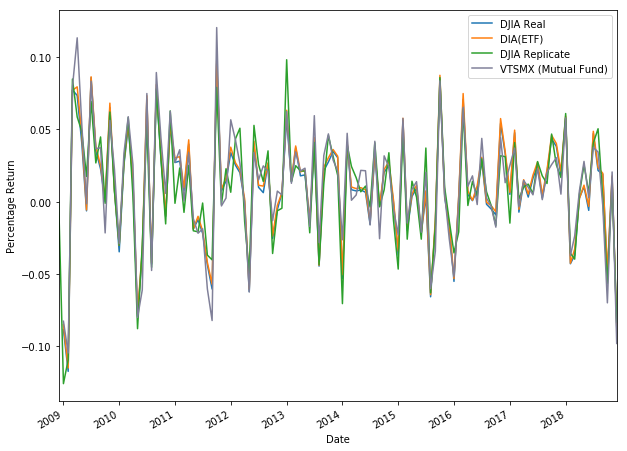

In [170]:
#retrieve data for the actual DJIA, ETF and Mutual fund
#plot on the same graph for the 4 lines 

djia = pd.read_csv('DJIA.csv')
djia['Date'] = pd.to_datetime(djia['Date'])

dia = pd.read_csv('DIA.csv')
dia['Date'] = pd.to_datetime(djia['Date'])

vtsmx = pd.read_csv('VTSMX.csv')
vtsmx['Date'] = pd.to_datetime(vtsmx['Date'])

# Set 'Date' as the index
djia.set_index('Date', inplace=True)
dia.set_index('Date', inplace = True)
vtsmx.set_index('Date', inplace = True)

fig= plt.figure(figsize=(10,8))
djia['Return'].plot(label='DJIA Real')
dia['Return'].plot(label='DIA(ETF)')
Dow_john['Return'].plot(kind='line', label='DJIA Replicate')
vtsmx['Return'].plot(label='VTSMX (Mutual Fund)',color=(0.5, 0.5, 0.6, 1))
ylabel('Percentage Return')
legend(loc='best')
show()

In [163]:
#merged the return of the actual and replicated

djia01= djia[['Return']]
djia01=djia01.fillna(0)

Dow_john1= Dow_john[['Return']]

dow_jones = pd.merge(Dow_john1, djia01, left_index=True, right_index=True, suffixes=('_replicated', '_actual'))

In [164]:
# calculate the difference of the return of replicate and return of actual 
dow_jones['difference']=dow_jones['Return_replicated']-dow_jones['Return_actual']

In [165]:
#dow_jones_stdv=dow_jones.resample('Y', how=np.mean)
#dow_jones_stdv['stdev']= dow_jones_stdv['sigma']/11

In [166]:
#calculate standard deviation 
dow_jones['difference'].std()

0.012867921879492782

In [167]:
Dow_john

Year Month         Index  Previous Month    Return
Date                                                          
2008-12-01  2008    12  1.252515e+08    0.000000e+00  0.000000
2009-01-01  2009    01  1.095057e+08    1.252515e+08 -0.125713
2009-02-01  2009    02  9.754072e+07    1.095057e+08 -0.109264
2009-03-01  2009    03  1.058161e+08    9.754072e+07  0.084841
2009-04-01  2009    04  1.120218e+08    1.058161e+08  0.058646
2009-05-01  2009    05  1.174796e+08    1.120218e+08  0.048721
2009-06-01  2009    06  1.195391e+08    1.174796e+08  0.017531
2009-07-01  2009    07  1.278404e+08    1.195391e+08  0.069444
2009-08-01  2009    08  1.312732e+08    1.278404e+08  0.026852
2009-09-01  2009    09  1.371552e+08    1.312732e+08  0.044807
2009-10-01  2009    10  1.370085e+08    1.371552e+08 -0.001070
2009-11-01  2009    11  1.455080e+08    1.370085e+08  0.062036
2009-12-01  2009    12  1.465380e+08    1.455080e+08  0.007079
2010-01-01  2010    01  1.421354e+08    1.465380e+08 -0.030044
2010-02-01  2010    02  1.460214e+08    1.421354e+08  0.027340
2010-03-01  2010    03  1.545214e+08    1.460214e+08  0.058211
2010-04-01  2010    04  1.551131e+08    1.545214e+08  0.003829
2010-05-01  2010    05  1.415082e+08    1.551131e+08 -0.087709
2010-06-01  2010    06  1.372900e+08    1.415082e+08 -0.029809
2010-07-01  2010    07  1.447352e+08    1.372900e+08  0.054230
2010-08-01  2010    08  1.381777e+08    1.447352e+08 -0.045307
2010-09-01  2010    09  1.489663e+08    1.381777e+08  0.078078
2010-10-01  2010    10  1.534371e+08    1.489663e+08  0.030012
2010-11-01  2010    11  1.510916e+08    1.534371e+08 -0.015286
2010-12-01  2010    12  1.605770e+08    1.510916e+08  0.062779
2011-01-01  2011    01  1.604072e+08    1.605770e+08 -0.001058
2011-02-01  2011    02  1.641542e+08    1.604072e+08  0.023360
2011-03-01  2011    03  1.629533e+08    1.641542e+08 -0.007316
2011-04-01  2011    04  1.670647e+08    1.629533e+08  0.025230
2011-05-01  2011    05  1.637171e+08    1.670647e+08 -0.020038
...          ...   ...           ...             ...       ...
2016-07-01  2016    07  2.698570e+08    2.620745e+08  0.029696
2016-08-01  2016    08  2.717089e+08    2.698570e+08  0.006862
2016-09-01  2016    09  2.709674e+08    2.717089e+08 -0.002729
2016-10-01  2016    10  2.665307e+08    2.709674e+08 -0.016374
2016-11-01  2016    11  2.750126e+08    2.665307e+08  0.031824
2016-12-01  2016    12  2.835905e+08    2.750126e+08  0.031191
2017-01-01  2017    01  2.794076e+08    2.835905e+08 -0.014750
2017-02-01  2017    02  2.908479e+08    2.794076e+08  0.040945
2017-03-01  2017    03  2.913946e+08    2.908479e+08  0.001880
2017-04-01  2017    04  2.943387e+08    2.913946e+08  0.010103
2017-05-01  2017    05  2.979303e+08    2.943387e+08  0.012202
2017-06-01  2017    06  2.996356e+08    2.979303e+08  0.005724
2017-07-01  2017    07  3.079608e+08    2.996356e+08  0.027784
2017-08-01  2017    08  3.134670e+08    3.079608e+08  0.017879
2017-09-01  2017    09  3.174298e+08    3.134670e+08  0.012642
2017-10-01  2017    10  3.322884e+08    3.174298e+08  0.046809
2017-11-01  2017    11  3.407649e+08    3.322884e+08  0.025510
2017-12-01  2017    12  3.464864e+08    3.407649e+08  0.016790
2018-01-01  2018    01  3.676213e+08    3.464864e+08  0.060998
2018-02-01  2018    02  3.545611e+08    3.676213e+08 -0.035526
2018-03-01  2018    03  3.405045e+08    3.545611e+08 -0.039645
2018-04-01  2018    04  3.422784e+08    3.405045e+08  0.005209
2018-05-01  2018    05  3.510475e+08    3.422784e+08  0.025620
2018-06-01  2018    06  3.531935e+08    3.510475e+08  0.006113
2018-07-01  2018    07  3.675340e+08    3.531935e+08  0.040602
2018-08-01  2018    08  3.860844e+08    3.675340e+08  0.050473
2018-09-01  2018    09  3.868665e+08    3.860844e+08  0.002026
2018-10-01  2018    10  3.650073e+08    3.868665e+08 -0.056503
2018-11-01  2018    11  3.700253e+08    3.650073e+08  0.013748
2018-12-01  2018    12  3.392386e+08    3.700253e+08 -0.083202

[121 rows x 5 columns]